In [1]:
import matplotlib.pyplot as plt
import numpy
import csv
import math

In [2]:
csv_file = open("insurance.csv","r",encoding="UTF-8") 
csv_reader = csv.DictReader(csv_file)

In [3]:
step_size = 1e-7

In [4]:

non_smokers = [[],[]]
smokers_low_bmi = [[],[]]
smokers_high_bmi = [[],[]]
row_counter = 0

for row in csv_reader :
    if row['smoker'] == 'yes':
        if float(row['bmi'].strip()) >=30 :
            smokers_high_bmi[0].append(int(row['age'].strip()))
            smokers_high_bmi[1].append(float(row['charges'].strip()))
        else :
            smokers_low_bmi[0].append(int(row['age'].strip()))
            smokers_low_bmi[1].append(float(row['charges'].strip()))
    else :
        non_smokers[0].append(int(row['age'].strip()))
        non_smokers[1].append(float(row['charges'].strip()))
        
non_smokers_regression = ()
smokers_low_bmi_regression = ()
smokers_high_bmi_regression = ()

In [33]:
length = 0
def set_length(l) : 
    global length 
    length = l
def error(X,Y,m,c):
    e = 0
    for i in range(length):
        y1 = m*X[i] + c
        e += math.pow(y1 - Y[i], 2)
    return e
def d_error_dm(X,Y,m,c):
    e = 0
    for i in range(length):
        e += (2*(m*X[i]+c-Y[i])*X[i])
    return e
def d_error_dc(X,Y,m,c):
    e = 0
    for i in range(length):
        e += 2*(m*X[i]+c-Y[i])
    return e

def linear_regression(X,Y,starting_m=0,starting_c=0):
    m = starting_m
    c = starting_c
    flag = 1
    count = 0
    while (flag):
        flag = 0
        m_err = d_error_dm(X,Y,m,c)
        if m_err !=0:
            m = m - (m_err*step_size)
            flag = 1
        c_err = d_error_dc(X,Y,m,c)
        if c_err!=0:
            c = c - (c_err*step_size)
            flag = 1
        if (count == 10000):
            print("m_err = %f c_err = %f"%(m_err,c_err))
            print("err = %f"%error(X,Y,m,c))
            print("m=%f,c=%f"%(m,c))
            count = 0
        else :
            count += 1
    return (m,c)


In [54]:

set_length(len(smokers_high_bmi[0]))
smokers_low_bmi_regression = linear_regression(smokers_high_bmi[0],smokers_high_bmi[1],294.087771,29984.831576)


m_err = 425.180808 c_err = -18844.660688
err = 2911728996.093562
m=293.655234,c=30004.002251
m_err = 410.963003 c_err = -18214.505900
err = 2911385485.156098
m=293.237161,c=30022.531870
m_err = 397.220633 c_err = -17605.423132
err = 2911064563.728820
m=292.833069,c=30040.441868
m_err = 383.937800 c_err = -17016.707746
err = 2910764746.310359
m=292.442489,c=30057.752967
m_err = 371.099137 c_err = -16447.678670
err = 2910484645.086903
m=292.064970,c=30074.485192
m_err = 358.689792 c_err = -15897.677605
err = 2910222963.508214
m=291.700075,c=30090.657901
m_err = 346.695408 c_err = -15366.068263
err = 2909978490.286067
m=291.347381,c=30106.289803
m_err = 335.102110 c_err = -14852.235637
err = 2909750093.787369
m=291.006482,c=30121.398984
m_err = 323.896485 c_err = -14355.585284
err = 2909536716.795976
m=290.676982,c=30136.002922
m_err = 313.065570 c_err = -13875.542637
err = 2909337371.618985
m=290.358500,c=30150.118513
m_err = 302.596834 c_err = -13411.552344
err = 2909151135.514862
m=290

m_err = 19.915453 c_err = -882.683207
err = 2906516803.629206
m=281.738460,c=30532.171834
m_err = 19.249492 c_err = -853.166780
err = 2906516049.972350
m=281.718877,c=30533.039761
m_err = 18.605800 c_err = -824.637366
err = 2906515345.876477
m=281.699950,c=30533.878664
m_err = 17.983632 c_err = -797.061959
err = 2906514688.082421
m=281.681655,c=30534.689516
m_err = 17.382270 c_err = -770.408658
err = 2906514073.545345
m=281.663972,c=30535.473252
m_err = 16.801017 c_err = -744.646629
err = 2906513499.420640
m=281.646880,c=30536.230781
m_err = 16.239200 c_err = -719.746067
err = 2906512963.050761
m=281.630360,c=30536.962979
m_err = 15.696170 c_err = -695.678166
err = 2906512461.952929
m=281.614392,c=30537.670693
m_err = 15.171299 c_err = -672.415082
err = 2906511993.807623
m=281.598959,c=30538.354741
m_err = 14.663980 c_err = -649.929902
err = 2906511556.447866
m=281.584041,c=30539.015914
m_err = 14.173624 c_err = -628.196614
err = 2906511147.849185
m=281.569622,c=30539.654979
m_err = 13

m_err = 0.842353 c_err = -37.334353
err = 2906505363.530653
m=281.177618,c=30557.029206
m_err = 0.814185 c_err = -36.085913
err = 2906505362.182374
m=281.176789,c=30557.065916
m_err = 0.786959 c_err = -34.879220
err = 2906505360.922753
m=281.175989,c=30557.101399
m_err = 0.760644 c_err = -33.712879
err = 2906505359.745967
m=281.175215,c=30557.135695
m_err = 0.735208 c_err = -32.585539
err = 2906505358.646567
m=281.174467,c=30557.168844
m_err = 0.710623 c_err = -31.495897
err = 2906505357.619466
m=281.173744,c=30557.200885
m_err = 0.686860 c_err = -30.442692
err = 2906505356.659906
m=281.173045,c=30557.231854
m_err = 0.663892 c_err = -29.424706
err = 2906505355.763447
m=281.172370,c=30557.261788
m_err = 0.641692 c_err = -28.440761
err = 2906505354.925940
m=281.171717,c=30557.290721
m_err = 0.620234 c_err = -27.489718
err = 2906505354.143511
m=281.171086,c=30557.318686
m_err = 0.599494 c_err = -26.570477
err = 2906505353.412534
m=281.170476,c=30557.345716
m_err = 0.579447 c_err = -25.681

m_err = 0.034437 c_err = -1.526305
err = 2906505343.062041
m=281.153861,c=30558.082137
m_err = 0.033286 c_err = -1.475267
err = 2906505343.059787
m=281.153827,c=30558.083637


KeyboardInterrupt: 

In [87]:
csv_file.close()

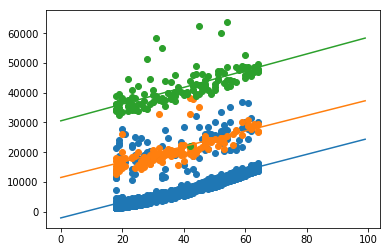

In [55]:
plt.scatter(non_smokers[0],non_smokers[1])
m = 267.248910
c = -2091.420420
X = numpy.arange(0,100,1)
Y = []
for i in X:
    Y.append(m*i+c)
Y = numpy.array(Y)
plt.plot(X,Y)
plt.scatter(smokers_low_bmi[0],smokers_low_bmi[1])
m = 260.639793
c = 11503.354928
X = numpy.arange(0,100,1)
Y = []
for i in X:
    Y.append(m*i+c)
Y = numpy.array(Y)
plt.plot(X,Y)
plt.scatter(smokers_high_bmi[0],smokers_high_bmi[1])
m = 281.153827
c = 30558.083637
X = numpy.arange(0,100,1)
Y = []
for i in X:
    Y.append(m*i+c)
Y = numpy.array(Y)
plt.plot(X,Y)

plt.show()